<h1 style="text-align:center">FORECASTING RNN</h1>

NAMA : GAYUH FIKRI KHUSNAELI

NIM : 21110024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,.

In [ ]:
# Mengimport kelas Tokenizer dari modul tensorflow.keras.preprocessing.text
# Digunakan untuk membuat kamus per kata dari teks yang ada
from tensorflow.keras.preprocessing.text import Tokenizer

# Mengimport kelas pad_sequences dari modul tensorflow.keras.preprocessing.sequence
# Digunakan untuk menambahkan padding pada data sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Mengimport modul Sequential dari library keras
# Digunakan untuk membuat model neural network secara berurutan
from keras.models import Sequential

# Mengimport kelas Dense, GRU, dan TimeDistributed dari library keras.layers
# Dense: Digunakan untuk menambahkan lapisan dense (fully connected) pada model
# GRU: Digunakan untuk menambahkan lapisan Gated Recurrent Unit pada model
# TimeDistributed: Digunakan untuk mengaplikasikan lapisan ke setiap langkah waktu dalam input sequence
from keras.layers import Dense, GRU, TimeDistributed

In [ ]:
#Membuat variabel 'bhs_x' dan 'bhs_y' dari data yang ada di google drive
bhs_x= pd.read_fwf('/content/drive/MyDrive/COLLEGE/SEMESTER 5/DEEP LEARNING/10. (05 Dec 23 )RNN/bahasa_uh.txt', header=None, delimiter='\t').values[:,0]
bhs_y= pd.read_fwf('/content/drive/MyDrive/COLLEGE/SEMESTER 5/DEEP LEARNING/10. (05 Dec 23 )RNN/bahasa_ah.txt', header=None, delimiter='\t').values[:,0]

In [ ]:
bhs_x

array(['ih uh eh ah ah uh uh ah oh uh eh oh oh oh eh ih eh ih uh eh',
       'ah ih uh ih ih ih ah oh uh uh eh ah ih ih eh uh uh oh oh oh',
       'ih ih uh ih ih eh uh ih oh ah ih ih uh eh eh oh ah ih ih ih', ...,
       'uh ah eh uh eh ah ih eh ih eh ah uh ah uh oh ah eh ih ah ih',
       'ah eh ih ah ih oh uh ih oh uh oh oh eh ah uh uh ih eh ah eh',
       'ah eh eh oh ah ah oh eh ah ih eh ih ih ah ah ah ah ih eh uh'],
      dtype=object)

In [ ]:
bhs_y

array(['ih uh eh ah ahh uhh uhhh ahhh oh uhhhh ehh ohh ohhh ohhhh ehhh ihh ehhhh ihhh uhhhhh ehhhhh',
       'ah ih uh ihh ihhh ihhhh ahh oh uhh uhhh eh ahhh ihhhhh ihhhhhh ehh uhhhh uhhhhh ohh ohhh ohhhh',
       'ih ihh uh ihhh ihhhh eh uhh ihhhhh oh ah ihhhhhh ihhhhhhh uhhh ehh ehhh ohh ahh ihhhhhhhh ihhhhhhhhh ihhhhhhhhhh',
       ...,
       'uh ah eh uhh ehh ahh ih ehhh ihh ehhhh ahhh uhhh ahhhh uhhhh oh ahhhhh ehhhhh ihhh ahhhhhh ihhhh',
       'ah eh ih ahh ihh oh uh ihhh ohh uhh ohhh ohhhh ehh ahhh uhhh uhhhh ihhhh ehhh ahhhh ehhhh',
       'ah eh ehh oh ahh ahhh ohh ehhh ahhhh ih ehhhh ihh ihhh ahhhhh ahhhhhh ahhhhhhh ahhhhhhhh ihhhh ehhhhh uh'],
      dtype=object)

In [ ]:
#Ini untuk membangun kamus bahasa uh
token_uh = Tokenizer()
token_uh.fit_on_texts(bhs_x) #memasukan data yang akan di tokenizer
kosakata_x = len(token_uh.word_index)

v_bhs_x = token_uh.texts_to_sequences(bhs_x)
v_bhs_x = pad_sequences(v_bhs_x, maxlen=20, padding='post')
v_bhs_x = v_bhs_x.reshape(v_bhs_x.shape[0], v_bhs_x.shape[1], 1)

#Ini untuk membangun kamus bahasa ah
token_ah = Tokenizer()
token_ah.fit_on_texts(bhs_y)
kosakata_y = len(token_ah.word_index)

v_bhs_y = token_ah.texts_to_sequences(bhs_y)
v_bhs_y = pad_sequences(v_bhs_y, maxlen=20, padding='post')
v_bhs_y = v_bhs_y.reshape(v_bhs_y.shape[0], v_bhs_y.shape[1], 1)

In [ ]:
kosakata_y

57

In [ ]:
token_uh.word_index

{'uh': 1, 'eh': 2, 'oh': 3, 'ih': 4, 'ah': 5}

In [ ]:
token_uh.texts_to_sequences(['ih', 'uh', 'oh'])

[[4], [1], [3]]

In [ ]:
token_uh.sequences_to_texts([[4,3,1]])

['ih oh uh']

In [ ]:
pad_sequences([[1, 2, 3]], maxlen=10, padding='post')

array([[1, 2, 3, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
bhs_x.shape

(10000,)

In [ ]:
v_bhs_x.shape

(10000, 20, 1)

In [ ]:
token_ah.word_index

{'eh': 1,
 'uh': 2,
 'oh': 3,
 'ah': 4,
 'ih': 5,
 'ehh': 6,
 'ohh': 7,
 'ahh': 8,
 'uhh': 9,
 'ihh': 10,
 'ehhh': 11,
 'ohhh': 12,
 'uhhh': 13,
 'ahhh': 14,
 'ihhh': 15,
 'ohhhh': 16,
 'ehhhh': 17,
 'ihhhh': 18,
 'ahhhh': 19,
 'uhhhh': 20,
 'uhhhhh': 21,
 'ihhhhh': 22,
 'ohhhhh': 23,
 'ehhhhh': 24,
 'ahhhhh': 25,
 'uhhhhhh': 26,
 'ohhhhhh': 27,
 'ehhhhhh': 28,
 'ihhhhhh': 29,
 'ahhhhhh': 30,
 'uhhhhhhh': 31,
 'ehhhhhhh': 32,
 'ahhhhhhh': 33,
 'ohhhhhhh': 34,
 'ihhhhhhh': 35,
 'uhhhhhhhh': 36,
 'ohhhhhhhh': 37,
 'ahhhhhhhh': 38,
 'ihhhhhhhh': 39,
 'ehhhhhhhh': 40,
 'uhhhhhhhhh': 41,
 'ehhhhhhhhh': 42,
 'ahhhhhhhhh': 43,
 'ohhhhhhhhh': 44,
 'ihhhhhhhhh': 45,
 'ahhhhhhhhhh': 46,
 'uhhhhhhhhhh': 47,
 'ehhhhhhhhhh': 48,
 'ihhhhhhhhhh': 49,
 'ohhhhhhhhhh': 50,
 'ahhhhhhhhhhh': 51,
 'i': 52,
 'ehhhhhhhhhhh': 53,
 'uhhhhhhhhhhh': 54,
 'o': 55,
 'ohhhhhhhhhhh': 56,
 'a': 57}

In [ ]:
model = Sequential()

model.add(GRU(32, input_shape=v_bhs_x.shape[1:], return_sequences=True))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(TimeDistributed(Dense(kosakata_y+1, activation='softmax')))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 20, 32)            3360      
                                                                 
 time_distributed_5 (TimeDi  (None, 20, 64)            2112      
 stributed)                                                      
                                                                 
 time_distributed_6 (TimeDi  (None, 20, 58)            3770      
 stributed)                                                      
                                                                 
Total params: 9242 (36.10 KB)
Trainable params: 9242 (36.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(v_bhs_x, v_bhs_y, batch_size=1, epochs=10, validation_split=0.2)

Epoch 1/10
8000/8000 [==============================] - 82s 10ms/step - loss: 1.2743 - accuracy: 0.5003 - val_loss: 0.8417 - val_accuracy: 0.6581
Epoch 2/10
8000/8000 [==============================] - 75s 9ms/step - loss: 0.6851 - accuracy: 0.7299 - val_loss: 0.5307 - val_accuracy: 0.7898
Epoch 3/10
8000/8000 [==============================] - 82s 10ms/step - loss: 0.3525 - accuracy: 0.8854 - val_loss: 0.2025 - val_accuracy: 0.9580
Epoch 4/10
8000/8000 [==============================] - 77s 10ms/step - loss: 0.1767 - accuracy: 0.9519 - val_loss: 0.1005 - val_accuracy: 0.9826
Epoch 5/10
8000/8000 [==============================] - 80s 10ms/step - loss: 0.1074 - accuracy: 0.9729 - val_loss: 0.0645 - val_accuracy: 0.9845
Epoch 6/10
8000/8000 [==============================] - 81s 10ms/step - loss: 0.0754 - accuracy: 0.9821 - val_loss: 0.0431 - val_accuracy: 0.9930
Epoch 7/10
8000/8000 [==============================] - 83s 10ms/step - loss: 0.0598 - accuracy: 0.9857 - val_loss: 0.0411 - 

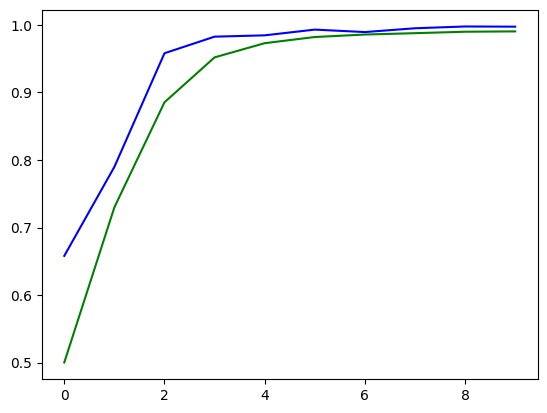

In [ ]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], 'g')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], 'b')
plt.show()

In [ ]:
# Ini adalah fungsi yang merubah probabilitas vektor ke dalam
# angka-angka diskrit yang kemudian dipergunakan sebagai basis
# pencarian kata yang sesuai dengan kamus token

def logits_to_text(logits, tokenizer):
  index_to_words = {id: word for word, id in tokenizer.word_index.items()}
  index_to_words[0] = ''
  return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

In [ ]:
kalimat_test = ['ih ih eh eh eh uh uh ah oh uh ah oh oh oh ah ih eh ih uh eh']
kalimat_test = token_uh.texts_to_sequences(kalimat_test)
kalimat_test = pad_sequences(kalimat_test, maxlen=20, padding='post')
kalimat_test = kalimat_test.reshape(kalimat_test.shape[0], kalimat_test.shape[1], 1)

y_pred = model.predict(kalimat_test)
print(logits_to_text(y_pred[0], token_ah))

1/1 [==============================] - 1s 1s/step
ih ihh eh ehh ehhh uh uhh ah oh uhhh ahh ohh ohhh ohhhh ahhh ihhh ehhhh ihhhh uhhhh ehhhhh
